Here is the code for Problem 1, in this code, I have defined a class with the main functions (updating the weights and bias, train and predict) and then made 10 instances of the class as my digit classifiers. You can see the results at the bottom. I used Sigmoid as the activation function and Squared Error Loss function.

In [4]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [5]:
# data load
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [6]:
# data reshape and black and white
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.0

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.0

In [7]:
# initial variables
batch_size = 600
epochs = 20
learning_rate = 1
data_size = train_images.shape[0]
dimension = train_images.shape[1]
digit_classifiers = []
models_train_accuracy = []
models_test_accuracy = []
predicted_labels_train = np.zeros((1,train_labels_original.shape[0]))
predicted_labels_test = np.zeros((1,test_labels_original.shape[0]))

In [8]:
class classifier2:
    
    def __init__(self, number, batch_size, dimension, learning_rate,train_labels_original,test_labels_original):
        self.number=number
        self.weight = np.zeros((dimension, 1))
        self.bias = 0
        self.dimension = dimension
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.Label_train_binary = [1 if a == number else 0 for a in train_labels_original]
        self.Label_test_binary = [1 if a == number else 0 for a in test_labels_original]
        self.Label_train_binary = np.asarray(self.Label_train_binary)
        self.Label_test_binary = np.asarray(self.Label_test_binary)
        self.train_labels_shuffled = np.zeros((1,train_labels_original.shape[0]))
    
    def sigmoid(self, z):
        s = 1.0/(1.0 + np.exp(-z))
        return s
    
    def backward(self, X, Y):
        z = np.dot(self.weight.T,X) + self.bias
        A = self.sigmoid(z)

        gradient_weight = 1.0/self.batch_size * np.dot(X, ((A-Y)*A*(1-A)).T)
        gradient_bias = 1.0/self.batch_size * np.sum(((A-Y)*A*(1-A)))

        return gradient_weight, gradient_bias
    
    def update(self, X, Y):
        X = X.transpose()
        gradient_weight, gradient_bias = self.backward(X, Y)

        self.weight = self.weight - self.learning_rate * gradient_weight
        self.bias = self.bias - self.learning_rate * gradient_bias


    def predict (self, X):
        Y_prediction = np.zeros((1,X.shape[0]))
        X = X.transpose()

        A = self.sigmoid(np.dot(self.weight.T, X) + self.bias)
        
        return A
    
    def Label_shuffle(self, shuffled_indices):
        self.train_labels_shuffled = self.Label_train_binary[shuffled_indices]

    def train(self, i, xi):
        yi = self.train_labels_shuffled[i : i + self.batch_size]
        self.update(xi,yi)

In [9]:
# creating 10 classifiers
for digit in range(10):
        digit_classifiers.append(classifier2(digit, batch_size, dimension, learning_rate,train_labels_original,test_labels_original))

In [10]:
# training classifiers
for epoch in range(epochs):
        Y_train_dic = []
        Y_test_dic = []
        shuffled_indices = np.random.permutation(data_size)
        train_images_shuffled = train_images[shuffled_indices]
        for digit in range(10):
                digit_classifiers[digit].Label_shuffle(shuffled_indices)
        for i in range(0, data_size, batch_size):
                xi = train_images_shuffled[i : i + batch_size]
                for digit in range(10):
                        digit_classifiers[digit].train(i,xi)
        
        for digit in range(10):
                Y_train_dic.append(digit_classifiers[digit].predict(train_images))
                Y_test_dic.append(digit_classifiers[digit].predict(test_images))

        predicted_labels_train = np.squeeze(np.argmax(Y_train_dic, axis = 0))
        predicted_labels_test = np.squeeze(np.argmax(Y_test_dic, axis = 0))

        train_accuracy = np.mean([int(i==j) for i, j in zip(predicted_labels_train, train_labels_original)]) * 100.0
        models_train_accuracy.append(train_accuracy)
        
        test_accuracy = np.mean([int(i==j) for i, j in zip(predicted_labels_test, test_labels_original)]) * 100.0
        models_test_accuracy.append(test_accuracy)

        print "epoch " + str(epoch) + " ====> train accuracy: {0:0.4f} ====> test accuracy: {1:0.4f}".format(train_accuracy, test_accuracy)

epoch 0 ====> train accuracy: 86.4967 ====> test accuracy: 87.4100
epoch 1 ====> train accuracy: 87.8183 ====> test accuracy: 88.8400
epoch 2 ====> train accuracy: 88.6517 ====> test accuracy: 89.4000
epoch 3 ====> train accuracy: 89.0333 ====> test accuracy: 89.8100
epoch 4 ====> train accuracy: 89.3233 ====> test accuracy: 90.1000
epoch 5 ====> train accuracy: 89.5400 ====> test accuracy: 90.5300
epoch 6 ====> train accuracy: 89.7517 ====> test accuracy: 90.5200
epoch 7 ====> train accuracy: 89.8550 ====> test accuracy: 90.6300
epoch 8 ====> train accuracy: 90.0317 ====> test accuracy: 90.8200
epoch 9 ====> train accuracy: 90.1100 ====> test accuracy: 90.8700
epoch 10 ====> train accuracy: 90.2833 ====> test accuracy: 91.0900
epoch 11 ====> train accuracy: 90.3917 ====> test accuracy: 91.1800
epoch 12 ====> train accuracy: 90.4167 ====> test accuracy: 91.2100
epoch 13 ====> train accuracy: 90.5267 ====> test accuracy: 91.2700
epoch 14 ====> train accuracy: 90.6050 ====> test accuracy

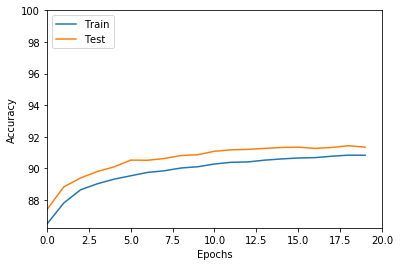

In [11]:
plt.plot(range(epochs), models_train_accuracy)
plt.plot(range(epochs), models_test_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(top = 100)
plt.xlim(0,20)
plt.show()